# Lab 1: Introduction to Python and Probability

In [ ]:
# Your code here
n=50
S=st.binom(n,.4)
N=st.norm(.4*n,(n*.4*.6)**.5)

print "1."
plt.figure()
x=np.linspace(0,100,101)
plt.title("Binomial PMF and Normal PDF")
plt.ylabel("P")
plt.xlabel("value")
plt.plot(x,S.pmf(x),'ro',label="Binomial PMF")
plt.plot(x,N.pdf(x),'b',label="Normal PDF")
plt.legend(loc="best")

print "\n2."
plt.figure()
x=np.linspace(0,100,101)
plt.title("Binomial and Normal CDF")
plt.ylabel("CDF")
plt.xlabel("value")
plt.plot(x,S.cdf(x),'ro',label="Binomial CDF")
plt.plot(x,N.cdf(x),'b',label="Normal CDF")
plt.legend(loc="best")
--lab 10

The main goal of this first lab is to introduce you to python through a few computing concepts in probability. At this point in your academic careers you should have some knowledge of object oriented computer programming. It would certainly help if you've had experience with Python, but if not, have no fear. Python is a very intuitive programming language. If you've coded in C#, JAVA, or Matlab you should have no trouble learning Python. Before we get too far into the code, we present a few general notions of what the environment will look like.

## IPython Notebook:

<html>
	<body>
		<p>
			The computer you are using to read this file probably has installed on it the Jupyter Notebook App or similar application to read IPython version 4 notebooks.  We also assume the notebooks are run using Python version 2.7XX rather than version 3.4XX.  For more information on installation or using an engineering work station (EWS) Linux machine, see instructions on the course webpage. An IPython Notebook file (with extension .ipynb) is an accumulation of cells, each composed of either code or markdown (i.e., text). Each code cell is individually executable. Each markdown cell can contain (among many things) LaTex and HTML.   Throughout each lab you will be shown examples of code, probability theory, and coding applications. *You will need to be able modify this file to include your own answers and edits. Each of the questions is numbered in bold and we ask that you put all your responses/code in cells just after the stated questions.  Let's go over some of the basics:</p>
		<ol>
			<li>
				<strong>Running a Cell: </strong>While the file is running one cell has the focus. To run the cell that is the current focus you can press the play button in the toolbar or use the shortcut SHIFT-ENTER. You will notice it brings the focus to the next cell after it completes. To run and keep focus in the same cell, you can use CTRL-ENTER. The order the cells run in can be important. In these labs the order will always go from top to bottom. In order to run code in the middle of the lab you may need to have run the code in a cell prior to it.&nbsp;</li>
			<li>
            	<strong>Stopping a Cell:</strong>There may come times when a particular section of code is causing errors or running an infinite loop. You may need to interrupt the cell from running. To do this simply click the stop button in the toolbar or use the shortcut CTRL-C</li>
			<li>
				<strong>Creating a Cell:</strong> A new cell can be created using the Insert tab at the top of the page. It will default to be a code type. You can change the cell type of any cell by clicking on it and then using the Cell tab at the top of the page. For normal text, use the &quot;markdown&quot; type. It allows you to use HTML and LaTex as well.</li>
			<li>
				<strong>Clearing Output:</strong> If your screen becomes too busy, it may be useful to be able to clear output. This can be done again from the Cell tab under &quot;All Output&quot;. The program is still running, but has been reset.</li>
			<li>
				<strong>Saving Your File:</strong> There is an autosave that can be set to save your file at a given rate (default is to save once every two minutes). If you prefer saving on your own you can use the File tab or the CTRL-S shortcut. A handy feature, also under the File tab, is that you can revert to a previous saved checkpoint.</li>
			<li>
				<strong>Keyboard Shortcuts:</strong> It can be useful to learn the keyboard shortcuts for these. They allow you to insert cells, run code, clear code, at a much quicker a pace. The list can be displayed by typing Ctrl-m h, and can be found here:&nbsp;<a href="http://ipython.org/ipython-doc/rel-1.1.0/interactive/notebook.html">http://ipython.org/ipython-doc/rel-1.1.0/interactive/notebook.html</a></li>
            <li>
				<strong>LaTex and Math:</strong> In these labs, you will be asked a number of questions, some requiring typed answers in a markdown cell, others requiring python answers in a code cell. It may be useful to learn LaTex to better explain yourself in mathematical terms. LaTex for the formulation of mathematical equations is very intuitive and can be picked up easily. For a reference, look here:&nbsp;<a href="https://www.artofproblemsolving.com/wiki/index.php/LaTeX:Symbols">https://www.artofproblemsolving.com/wiki/index.php/LaTeX:Symbols</a></li>
		</ol></body>
</html>

## Introduction to Python Code

#### Importing Modules

Python is an object oriented programming language where the user has access to functions through imported packages. A package is a collection of modules in directories that have a hierarchy.  The three most common packages that we will use in this course are numpy, scipy, and matplotlib, though we will pick up others along the way. Before you can use any of these, you must import them. You only need to import them once in an IPython Notebook file, and then any cell in the notebook can have access to them. Running the code below imports all the pakages you will need for this lab. The simple print statement lets you know when it's completed. 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
print "Modules Imported!"

Modules Imported!


The first line is slightly different than the others and uses what is known as a "magic" function. This particular "magic" function simply makes it so that the plots we generate with the matplotlib package occur inline as opposed to opening in new windows outside of the notebook.

#### Basic Math

Python is very similar to Matlab and can be used to solve numerical problems. We simply need to run an expression and it will output an answer. 

In [3]:
3+4*2

11

We can also create a variable, set it equal to an expression, and print the value.

In [4]:
x = 3+4**2
print(x)

19


We used ** to represent an exponent. Similarly, we can take the square root of a number this way.  Here is an attempt:

In [5]:
3+4**(1/2)

4

Did you expect to get $5$? A tricky part of Python is keeping track of how types work. The reason we got 4 as an answer lies in the computation of $\frac{1}{2}$. Since $1$ and $2$ are both integers, Python makes $\frac{1}{2}$ an integer as well and rounds the $0.5$ to $0$. By including a decimal after the $1$, we can signify that we want to treat $1.0$ as a double precision number. Notice our output is now a double too. (This is the default behavior in Python 2.7. In Python 3.0, this changes and the default behavior is double division)

In [6]:
3+4**(1./2)

5.0

Python handles lists very similarly to Matlab. We can set variables equal to lists and perform operations on them. We can change the contents of the list and they don't need to be of the same type. This is called being mutable. Note that Python indexes starting with 0, as shown below.

In [7]:
x = [1,2,3,4,5]
y = [6,7,8,9,10]
print (x, y)
x[0] = 'Dog'
print (x[0])

([1, 2, 3, 4, 5], [6, 7, 8, 9, 10])
Dog


Python also has what is known as a tuple. A tuple is very similar to a list, but is immutable. We cannot change the contents of the tuple. Tuples are often used to input or return objects. Below is the same code as above, but with tuples. It gives us an error message when we try to set x[0].

In [8]:
x = (1,2,3,4,5)
y = (6,7,8,9,10)
print x, y
x[0] = 'Dog'
print x[0]

(1, 2, 3, 4, 5) (6, 7, 8, 9, 10)


TypeError: 'tuple' object does not support item assignment

Below is a list of tuples. It has two tuples and each tuple has five elements.

In [9]:
x = [(1,2,3,4,5),(6,7,8,9,10)]
print x
print x[0][3]

[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]
4


You may like to think of lists and tuples as arrays in some sense, but try to keep them separate. An array is actually an object from the NumPy module. We'll go over them a little bit further in the lab, but there are some notable differences.

#### Ifs, Loops, and Functions

If statements in Python are like those of most other languages. You need to use a keyword (if or else), followed by a condition, and finally a colon (:). Keep in mind instead of using brackets for grouping, Python goes by indentation. In the if statement below all parts of the if statement are contained within that indentation.

In [11]:
x = 3
y = 1
if x>y:
    print "I"
    if x>3:
        print "Hate"
    else:
        print "Love"
    print "Probability"
print "!"

I
Love
Probability
!


For loops use the keyword "for" followed by a variable and the keyword "in" and a certain range or vector. The same rules for indentation apply here. Recall that indexing starts at 0. The range(n) function simply creates a integer list from 0 to n-1 in whole number increments.

In [12]:
x = [0,0,0,0,0]
for i in range(5):
    c = 2*i**2
    x[i]=c
print x

[0, 2, 8, 18, 32]


Similarly, you can use while loops. In the code below, we make use of the .append method of a list to keep adding to our list without needing to know the size initially. (By the way, a "method" is a function associated with an object.  In this case, append is a method associated with a list.)

In [13]:
x = [0]
i = 0
while x[i]<12:
    i = i+1
    x.append(i)
print x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


To specify a function, we need to use the "def" keyword. You need to give the number of inputs and have a return line to end your function. Below is a function that returns the factorial of the input.

In [14]:
def factorial(x):
    c = 1
    for i in range(x,1,-1): #range(x,1,-1) creates a vector from x to 2 in -1 increments
        c = c*i
    return c

print factorial(5)

120


You can also return multiple outputs. Technically, we are still returning a single object, but it is a tuple. We can unpack the tuple when we call the function. Below is a function that returns the first and last digit of any integer.

In [15]:
def firstNlast(x):
    l = x%10 # Uses the modulus operator %
    while x>0:
        f = x%10
        x=x/10
    return f,l

x = 70094921348
first, last = firstNlast(x)
print first, last

7 8


The returned items get returned as a tuple and you can individually retrieve them by setting them equal to another tuple.

#### Using Modules

One of the reasons Python is so popular is due to the building capability of the packages. Remember those files we imported initially? We have access to all of the methods they contain. We abbreviated them to shorthand signifiers so we can code more quickly. It would be impossible to give you an overview of all the useful methods because there are so many. But they are fairly intuitive, so if you think something should be a method, it's probably included. Let's start with NumPy and create an array.

In [16]:
x = np.array([1,2,3,4,5])
print x
print x[3]

[1 2 3 4 5]
4


In order to access the "array" method we just needed to type our signifier "np" and then put a decimal and the method. If you want a list of methods to come up as you're coding, after typing the decimal, hit tab on your keyboard. We can similarly declare multidemensional arrays, but notice the use of brackets and indexing. Unlike lists, arrays can only contain a single type. Indexing is also done a little more intuitively (like Matlab) than that of lists. Arrays are also mutable and can be used in multiple dimensions (to create matrices for instance).

In [17]:
x = np.array([[1,2,3],[4,5,6],[7,8,9]])
print x
print x[0,0]
print x[:,1]
print x[1,:]

[[1 2 3]
 [4 5 6]
 [7 8 9]]
1
[2 5 8]
[4 5 6]


To give you a better idea of how to use these modules, here are a number of coding examples with functions that will be particularly useful to you this semester. Below we create a function and then plot it over time. Of course we need to properly title and label the graph.

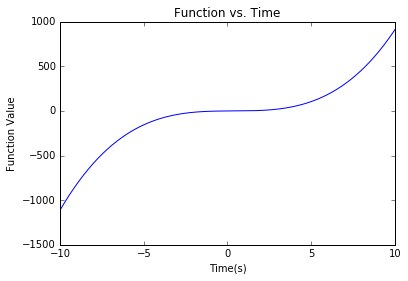

In [18]:
def f(t): #Creates the function that we are going to plot
    return t**3-t**2+t-1

t = np.linspace(-10,10,1000) #Creates an array from -10 to 10 with 1000 points in it
plt.plot(t,f(t)) #Generates a plot of these two vectors.
plt.title('Function vs. Time')
plt.xlabel('Time(s)')
plt.ylabel('Function Value')

The following code is going to create a large vector of random numbers using NumPy's random function. Then it's going to plot them. It's taking the random numbers from an exponential distribution and a normal (Gaussian) distribution. These are both continuous type random variables which you will learn about later in the course.

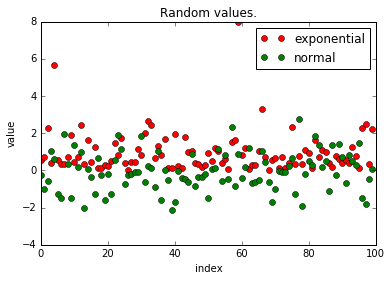

In [19]:
x = np.random.exponential(1,size = 100) #Generates a vector of 100 points from the exponential distribution
y = np.random.normal(size = 100) #Generates a vector of 100 points from the Normal distribution
plt.plot(x,'ro', label='exponential') #Plots x in red circles with the label exponential
plt.plot(y,'go', label = 'normal')
plt.title('Random values.')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()

This code creates two matrices, multiplies one times the transpose of the other and then finds the eigenvalues:

In [20]:
A = np.array([(3,7,9),(4,5,1),(12,6,3)]) #Creates Matrix A
B = np.array([(1,0,3),(2,4,0),(8,3,1)]) #Creates Matrix B
A_transpose = A.T #Takes the transpose of A
C = A_transpose.dot(B) #Takes the matrix multiplication of A_transpose and B. Note using * performs a different operation on 2-d arrays
                       # * is the usual matrix multiplication when applied to np.matrix objects
print np.linalg.eigvals(C) #Uses the eigvals method under linalg under NumPy to print the eigenvalues

[ 149.57404656    8.88119895   16.54475449]


These are just the basics to be able to program in Python. For a more complete tutorial, take a look at https://docs.python.org/2.7/tutorial/index.html

## Creating Probability Distribution Objects for Discrete Distributions

The scipy stats package contains a number of functions for using and analyzing distributions.  Two of its classes are rv_discrete and rv_continous, for discrete type and for continuous type distributions, respectively.   A discrete probability distribution is specified by a set of possible numerical values, $c_1,c_2, \ldots $ and associated probabilities for the values, $p_1, p_2, \ldots $ which sum to one.  The *probability mass function* $p$ for the distribution is defined by $p(c_i)=p_i$ for all $i,$  and $p(c)=0$ for values $c$ not in the  list of possible values.   A random variable $X$ has such a discrete distribution if $P\{X = u\} = p(u)$ for all $u.$  For example, if $X$ represents the number showing on a roll of a fair die, then the vector of values is (1,2,3,4,5,6) and the vector
of associated probabilities is $\left( \frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6}\right).$

There are several important families of discrete probability distributions that frequently arise in applications.
A very basic example is the Bernoulli distribution with parameter $p,$  where $0\leq p \leq 1.$
The distribution assigns probability $p$ to value 1, and probability $1-p$ to value 0. If a random variable $X$ has the
Bernoulli distribution with parameter $p$, we call $X$ a *Bernoulli random variable* with parameter $p,$ and we write
$X \sim Bernoulli(p).$   For example, if $X \sim Bernoulli(\frac{1}{4}),$ then $P\{X = 1\}=\frac{1}{4}$ and
$P\{X = 0\}=1-\frac{1}{4} = \frac{3}{4}$.  There is zero probability that $X$ is any value other than $1$ or $0$.  The class rv_discrete within the scipy stats package is for working with general discrete type random variables, with many instances of the class corresponding to particular well known probability distribuions.  It gives a convenient way to compute the mean, variance, pmf, and other attributes for a given distribution, and for generating random variates, using random number generators, with the given distribution.

For example, one instance of the rv_discrete class is the object for the Bernoulli distribution.  By specifying (aka freezing) a value for the parameter $p$ we create a more specialized instance of a rv_discrete class.  The cumulative distribution function (CDF) of a random variable $X$ is the function $F_X$ defined by $F_X(c)=P\{X\leq c\}$ for any real value of $c.$ In general, the CDF $F_X(c)$ is nondecreasing in $c$ with limit 0 at $-\infty$ and 1 at $+\infty.$   The CDF for the $Bernoulli(\frac{1}{4})$ distribution has a jump of size 3/4 at zero and a jump of size 1/4 at one.

Mean: 0.25
Var: 0.1875


[-4, 4, 0, 1.05]

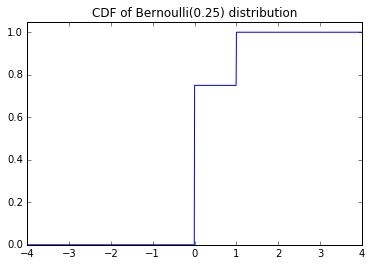

In [21]:
p = 1./4 #Sets the probability, uses decimal to create double (not integer)
bernoulli25 = st.bernoulli(p) #Generates object for Bernoulli(0.25) distribution
x = np.linspace(-4,4,1001) #Generates a vector on [-4,4] with 1001 points in it
print 'Mean:', bernoulli25.mean()  #Prints the mean (aka expected value) for the distribution
print 'Var:', bernoulli25.var()   #Prints the variance of X
plt.plot(x,bernoulli25.cdf(x))  #Creates a graph of the cumulative distribution fucntion (CDF)  of X
plt.title('CDF of Bernoulli(0.25) distribution')
plt.axis([-4, 4, 0, 1.05]) #Sets bounds on the plot axis

Above, we were able to create our Bernoulli distribution through scipy.stats. 
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Using the scipy.stats package do the following:
<html>
    <body>
        <ol>
            <li> Print the mean and standard deviation of a Bernoulli variable where $p=\frac{14}{17}.$  [Tip: If you type the name of an object followed by a period, such as bernoulli25.  in a code cell and then press the tab key, a list of methods for that object is displayed.]</li>
            <li> Create a graph of the probability mass function (pmf).  (The function is zero except at zero and one).  Try adapting the code in the previous cell to plot the pmf.  What happens if you change np.linspace(-4,4,1001) to np.linspace(-4,4,1000)? Can you explain why?
            </li>
        </ol>
    </body>
</html>

Mean:  0.823529411765
Standard Deviation:  0.381220041083


[-4, 4, 0, 1.05]

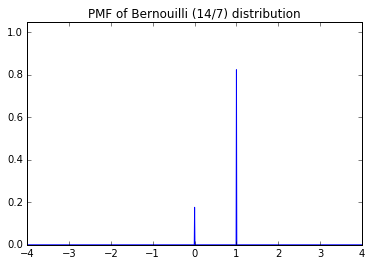

In [73]:
# Your code here
#1
bern14 = st.bernoulli(14./17)
print "Mean: ",bern14.mean()
print "Standard Deviation: ",bern14.std()

#2. 
x = np.linspace(-4,4,1001)
plt.plot(x,bern14.pmf(x))
plt.title("PMF of Bernouilli (14/7) distribution")
plt.axis([-4,4,0,1.05])


In [75]:
print np.linspace(0,10,10)
print np.linspace(0,10,11)

[  0.           1.11111111   2.22222222   3.33333333   4.44444444
   5.55555556   6.66666667   7.77777778   8.88888889  10.        ]
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


<b> Student Answer for last part of Problem 1, part 2. </b>  (Questions such as "What happens if . . . ?" and "Can you explain why?" call for answers writen out as text in a markdown cell such as this one, rather than in a code cell.):

__Answer:__ if you change np.linspace(-4,4,1001) to np.linspace(-4,4,1000) the graph is empty. This is because the Bernouilli distribution only has values at 0 or 1, and when linspace creates 1001 evenly spaced points between -4,4 two of these points are 0. and 1. so you see a distribution. If you instead create 1000 evenly spaced points, you get a set of points that does not contain 0 and 1 so no values are shown (even if they're really close to 0 and 1.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

Now what if we wanted to create a distribution object of our own? One way to do this is to use
SciPy's rv_discrete class.  In order to have a discrete RV, we need to specify the probability for any value our RV can be, so we create two vectors (we acutally use python tuples, numpy arrays would also work). The first is a vector of probabilities. Let $p =p_1,p_2,...,p_m$ where $\sum_{i=1}^m {p_i}=1$. The second is a vector of values. Let $c=c_1,c_2,...,c_m$ such that $P\{X=c_i\}=p_i$. These two vectors specify the pmf.  The custom probability distribution object can be created, and then used as before: 

Mean: 5.2
Var: 12.28


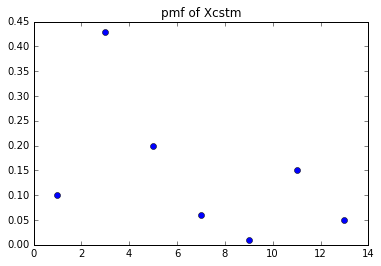

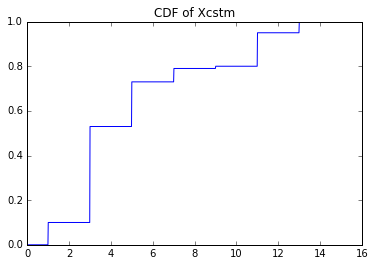

In [5]:
p = [.1,.43,.2,.06,.01,.15,.05] #Vector of probabilities (as a tuple)
c = [1,3,5,7,9,11,13] #Vector of values (as a tuple)
Xcstm = st.rv_discrete(values=(c,p)) #Creates an instance (aka object) of rv_discrete from our vectors
print 'Mean:', Xcstm.mean()
print 'Var:', Xcstm.var()
plt.plot(c,Xcstm.pmf(c),'o') #Plots the pmf. The 'o' indicates to plot the points discretely as circles
plt.title('pmf of Xcstm')
plt.figure() #Let us be able to plot another graph below the first
n = np.linspace(0,15,1000)


plt.plot(n,Xcstm.cdf(n))
plt.title('CDF of Xcstm')

<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** Simulate a single roll of a standard six sided die. The probability of any side being rolled is $\frac{1}{6}$ and the value is how many dots on the die are facing up.
<html>
    <body>
        <ol>
            <li> Create your own discrete variable to represent a die roll</li>
            <li> Print out the mean</li>
            <li> Graph the CDF</li>
        </ol>
    </body>
</html>

Mean:  3.5


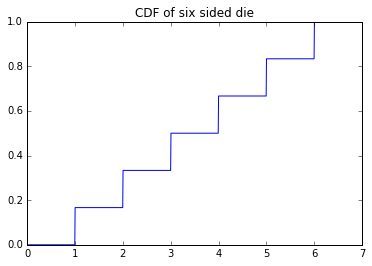

In [22]:
# Your code here
#1
c = (1,2,3,4,5,6)
p = (1./6,1./6,1./6,1./6,1./6,1./6)
X = st.rv_discrete(values = (c,p))
#2
print "Mean: ", X.mean()
#3
n = np.linspace(0,7,1000)
plt.plot(n,X.cdf(n))
plt.title("CDF of six sided die")

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

If $n$ independent trials are conducted, each with success probability $p,$  then the number of successes has the binomial distribution with parameters $n$ and $p.$   For example, say you were to roll a die eight times, what's the probability you get six showing on exactly five of the rolls? For each trial, $P\{X=6\}=\frac{1}{6}$. So in eight trials the probability you would get exactly five sixes is: $p_x(k)=\binom{n}{k}p^k(1-p)^{n-k}=\binom{8}{5}\left(\frac{1}{6}\right)^5\left(\frac{5}{6}\right)^3.$
Here, $\binom{n}{k}$ represents a binomial coefficient, defined by $\binom{n}{k}=\frac{n!}{k!(n-k)!}.$  Like the Bernoulli distribution, the stats package has an object for the Binomial distribution.

In [34]:
#Calculates the probability of getting 5 sixes in 8 trials of a standard die roll
n = 8
p = 1./6
our_binom = st.binom(n,p) #Creates an instance of the binomial distribution object from
                  #the general binomial distribution object by freezing n and p to the values we want
print 'P{X=5}=',our_binom.pmf(5) #Prints the probability that X=5


P{X=5}= 0.00416761926536


Now it's your turn.  The idea of the following problem is for you to create a binomial distribution object for specific parameter values in two different ways.   The first way is as in the previous cell. The other way, is for you to build essentially the same object using the way you defined an object for the roll of a fair die,   which requires you to use the above formula for the binomial distribution. 
<br>
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** I'm going to roll a standard die 12 times and count how many times I roll a $1$ or $2$. 
<html>
    <body>
        <ol>
            <li> Using the st.binom object, create a specialized object my_binom1 for the distribution by freezing n and p to appropriate values. </li>
            <li> Using the formula above and the custom way to make random distributions from the class rv_discrete, create your own specialized object my_binom2 that represents this. (Hint: You need to determine your own p and c vectors, <I> without using st.binom at all--the point
            is to build up an object the same as the one produced by st.binom without
            relying on st.binom at all).</I> </li>
            <li> Print the probability that you roll a $1$ or $2$ a prime number of times (out of the 12 rolls, ie 2,3,5,7,11). Do this calculation using binom1 and then again using binom2.
            Do your calculations agree?</li>
        </ol>
    </body>
</html>

In [62]:
# Your code here
#1
n=12
p=1./3
my_binom1=st.binom(n,p)

#2

def factorial(y):
    a=1
    for i in range(y,1,-1):
        a=a*i
    return a

c = range(0,13)
print c
p_v=[]

for k in c:
    p_v.append(1.0*factorial(12)/(factorial(k)*factorial(12-k))*((1./3)**k)*((2./3)**(12-k)))
print np.sum(p_v)

my_binom2=st.rv_discrete(values = (c,p_v))

#3
times = (2,3,5,7,11)
sum1,sum2=0.0,0.0
for t in times:
    sum1+= my_binom1.pmf(t)
    sum2+=my_binom2.pmf(t)

print 'P{X=2,3,5,7,11}='
print 'with my_binom1: ',sum1
print 'with my_binom2:',sum2




[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
1.0
P{X=2,3,5,7,11}=
with my_binom1:  0.577614448264
with my_binom2: 0.577614448264


__Answer:__ The calculations do agree!

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 